In [42]:
!pip uninstall opencv-python --yes
!pip install opencv-contrib-python
print("start")
import cv2
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import itertools
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from scipy.cluster.vq import *
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn import svm
import pickle

In [42]:
def to_gray(color_img):
    gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    return gray

def gen_sift_features(gray_img):
    sift = cv2.xfeatures2d.SIFT_create()
    kp, desc = sift.detectAndCompute(gray_img, None)
    return kp, desc

def show_sift_features(gray_img, color_img, kp):
    return plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/bin/python -m pip install --upgrade pip' command.
start


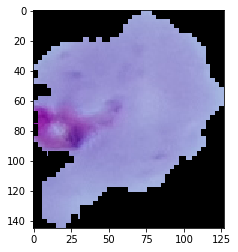

In [45]:
img = cv2.imread('test/Parasitized/C100P61ThinF_IMG_20150918_144823_cell_161.png')
plt.imshow(img)

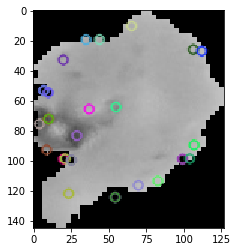

In [43]:
img_gray = to_gray(img)
img_kp, img_desc = gen_sift_features(img_gray)
show_sift_features(img_gray, img, img_kp);

In [ ]:
from sklearn.preprocessing import StandardScaler

train_path = os.path('train')
training_names = os.listdir(train_path)  # Listing the train_path directory

image_paths = []  
image_classes = [] 
class_id = 0
for training_name in training_names:  # Iterate over the training_names list
    dir = os.path.join(train_path, training_name)
    class_path = imutils.imlist(dir)
    image_paths+=class_path
    image_classes+=[class_id]*len(class_path)
    class_id+=1

feature_det = cv2.FeatureDetector_create("SIFT")
descriptor_ext = cv2.DescriptorExtractor_create("SIFT")

des_list = []
for image_path in image_paths:
    im = cv2.imread(image_path)
    kpts = fea_det.detect(im)  # Computing the keypoints
    kpts, des = descriptor_ext.compute(im, kpts)  # Computing the key points/descriptors
    des_list.append((image_path, des))  

# Stack all the descriptors
descriptors = des_list[0][1]
for image_path, descriptor in des_list[1:]:
    descriptors = np.stack((descriptors, descriptor))  # Stacking the descriptors

# Perform k-means clustering
k = 500  # Number of clusters
voc, variance = kmeans(descriptors, k, 1)  # Perform Kmeans with default values

# Perform Tf-Idf vectorization
nbr_occurences = np.sum( (im_features > 0) * 1, axis = 0)
# Calculating the number of occurrences
idf = np.array(np.log((1.0*len(image_paths)+1) / (1.0*nbr_occurences + 1)), 'float32')
# Giving weight to one that occurs more frequently

# Scaling
stdSlr = StandardScaler().fit(im_features)
im_features = stdSlr.transform(im_features)  